# Welch's t-test for Comparing Two Population Means

In [429]:
import numpy as np
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
plt.style.use('bmh')

## Load Data

In [431]:
data = pd.read_csv('../data/body_temp.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Obs        130 non-null    int64  
 1   BodyTemp   130 non-null    float64
 2   Gender     130 non-null    int64  
 3   HeartRate  130 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 4.2 KB


## Describe Data

In [432]:
data.describe()

,Obs,BodyTemp,Gender,HeartRate
count,130.000000,130.000000,130.000000,130.000000
mean,65.500000,98.249231,1.500000,73.761538
std,37.671829,0.733183,0.501934,7.062077
min,1.000000,96.300000,1.000000,57.000000
25%,33.250000,97.800000,1.000000,69.000000
50%,65.500000,98.300000,1.500000,74.000000
75%,97.750000,98.700000,2.000000,79.000000
max,130.000000,100.800000,2.000000,89.000000


In [433]:
mTemp = data[data['Gender']==1].BodyTemp
fTemp = data[data['Gender']==2].BodyTemp
df = pd.DataFrame({'male':mTemp.describe().round(3),
                   'female':fTemp.describe().round(3)})
df.iloc[:3,:]

,male,female
count,65.000,65.000
mean,98.105,98.394
std,0.699,0.743


### We want to comapre the means between men's and women's body temperature, 98.105 and 98.394 respectively

## Plot BodyTemp Distributions

Man's mean:  98.105
Women's mean: 98.394


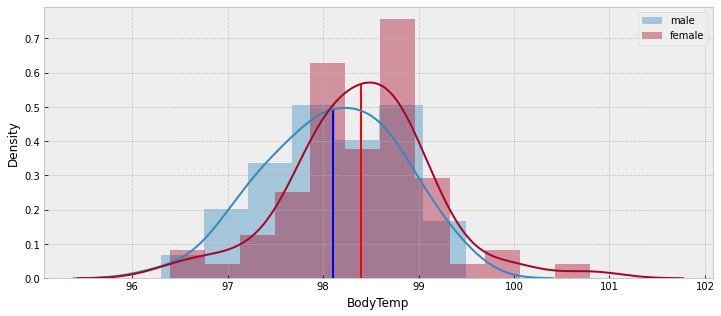

In [434]:
print('Man\'s mean: ', np.round(mTemp.mean(),3))
print('Women\'s mean:', np.round(fTemp.mean(),3))

fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.distplot(mTemp, kde=True, label='male')
sns.distplot(fTemp, kde=True, label='female')

ax.vlines(x=mTemp.mean(), ymin=0, ymax=0.49, color='b')
ax.vlines(x=fTemp.mean(), ymin=0, ymax=0.565, color='r')

plt.legend()
plt.show()

## t-statistic

$$ \large t = \frac{X_1 - X_2}{\sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$ 

In [435]:
dMean = mTemp.mean() - fTemp.mean()
dStd = np.sqrt( (mTemp.std()**2) / len(mTemp) + (fTemp.std()**2) / len(fTemp) )
t_stat = dMean / dStd
print(f'\nt satatistic: {t_stat}')


t satatistic: -2.2854345381654997


## Welch degrees of freedom

$$ \Large w_{df} = \frac{(s_1 + s_2)^2}{\frac{s_1^2}{n_1-1} + \frac{s_2^2}{n_2-1}} $$
### where
$$ s_i = \frac{\sigma_i^2}{n_i}, \ \ \ \ \ i\in\{1,2\} $$

In [436]:
v1 = np.var(mTemp)
v2 = np.var(fTemp)
n1 = len(mTemp)
n2 = len(fTemp)

vn1 = v1/n1
vn2 = v2/n2

In [437]:
vn1 = v1/n1
vn2 = v2/n2

In [438]:
w_df = (vn1 + vn2)**2 / (vn1**2/(n1-1) + vn2**2/(n2-1))
print(f'\nDegrees of freedom: {w_df}')


Degrees of freedom: 127.51030083039093


## Probabilities of observing the estimated t value


t-statistic: -2.2854345381654997

Probability of finding t (p-value): 0.0239
Probability of not finding t:       0.9761


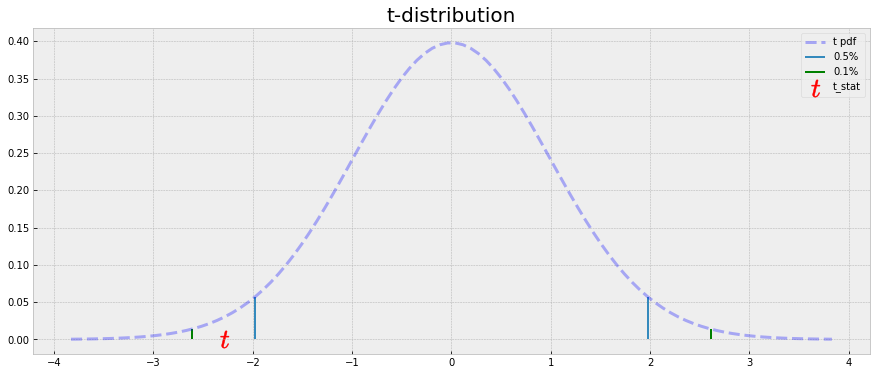

Cut-off values at 95% confidence level => (-1.9787433665531817, 1.9787433665531813)
Cut-off values at 99% confidence level => (-2.6149366303130135, 2.614936630313013)


In [439]:
a = 2*stats.t.cdf(t_stat, df=w_df)
p = 1 - a
print(f'\nt-statistic: {t_stat}')
print(f'\nProbability of finding t (p-value): {np.round(a,4)}')
print(f'Probability of not finding t:       {np.round(p,4)}')


fig, ax = plt.subplots(1, 1, figsize=(15,6))
plt.title('t-distribution', fontsize=20)
x = np.linspace(stats.t.ppf(0.0001, w_df),
                stats.t.ppf(0.9999, w_df), 100)
ax.plot(x, stats.t.pdf(x, w_df),
       'b--', lw=3, alpha=0.3, label='t pdf')

alpha = 0.05/2
a = stats.t.ppf(alpha, w_df)
fa = stats.t.pdf(a, w_df)
b = stats.t.ppf(1-alpha, w_df)
fb = stats.t.pdf(b, w_df)

ax.vlines(x=a, ymin=0, ymax=fa, label='0.5%')
ax.vlines(x=b, ymin=0, ymax=fb)

alpha = 0.01/2
a = stats.t.ppf(alpha, w_df)
fa = stats.t.pdf(a, w_df)
b = stats.t.ppf(1-alpha, w_df)
fb = stats.t.pdf(b, w_df)

ax.vlines(x=a, ymin=0, ymax=fa, color='g', label='0.1%')
ax.vlines(x=b, ymin=0, ymax=fb, color='g')

ax.scatter(x=t_stat, y=0, marker="$t$", s=300, c='r', label='t_stat')
plt.legend()
plt.show()

alpha = 0.05/2
print(f'Cut-off values at 95% confidence level => {stats.t.ppf(alpha, w_df), stats.t.ppf(1-alpha, w_df)}')
alpha = 0.01/2
print(f'Cut-off values at 99% confidence level => {stats.t.ppf(alpha, w_df), stats.t.ppf(1-alpha, w_df)}')

### There is a significat difference in the means at the 95% confidence level ( $p=0.0239 < 0.05$ ) but not at the 99% ( $p=0.0239 > 0.01$ )

## Confidence Intervals


0 NOT IN [-0.54, -0.039] => significant difference at 0.05 level
0 IN [-0.62, 0.042] => not significant difference at 0.01 level


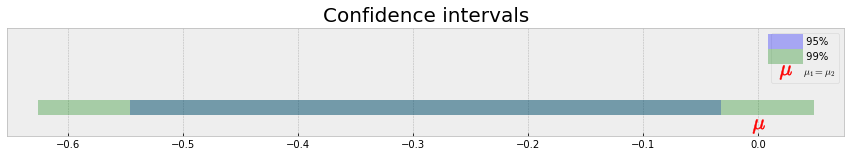

In [441]:
fig, ax = plt.subplots(1, 1, figsize=(15,2))
plt.title('Confidence intervals', fontsize=20)

me = mTemp.mean() - fTemp.mean()

alpha = 0.05/2
te = stats.t.ppf(1-alpha, w_df)*dStd
a, b = np.round(me-te,3), np.round(me+te,3)
print(f'\n0 NOT IN [{a}, {b}] => significant difference at 0.05 level')
x = np.linspace(a, b, 100)
ax.plot(x, np.ones(len(x))*0.1,
       'b-', lw=15, alpha=0.3, label=' 95%')

alpha = 0.01/2
te = stats.t.ppf(1-alpha, w_df)*dStd
a, b = np.round(me-te,3), np.round(me+te,3)
print(f'0 IN [{a}, {b}] => not significant difference at 0.01 level')

x = np.linspace(a, b, 100)
ax.plot(x, np.ones(len(x))*0.1,
       'g-', lw=15, alpha=0.3, label=' 99%')

ax.scatter(x=0, y=0, marker="$\mu$", s=200, c='r', label=r'$\mu_1=\mu_2$')
#ax.scatter(x=me, y=0, marker=r'$\mu^*$', s=200, c='r', label=r'$\mu_1\ne\mu_2$')

ax.set_ylim(-0.05, 0.5)
plt.yticks([])
plt.legend()
plt.show()

## Two sided Welch Test (Scipy)

In [442]:
print(stats.ttest_ind(mTemp, fTemp, equal_var = False))

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.023938264182940983)
